In [1]:
import pandas as pd
df_train = pd.read_csv("data/technical/sales_train.csv")
df_shops = pd.read_csv("data/info/shops.csv")
df_items = pd.read_csv("data/info/items.csv")

# Autoplot for Reference

In [2]:
# https://www.kaggle.com/yasserhessein/predict-future-sales-using-4-algorithms-regression

from autoviz.AutoViz_Class import AutoViz_Class

def plot_all():
    AV = AutoViz_Class()
    target='item_price'
    df = AV.AutoViz(filename="",sep=',', depVar=target, dfte=df_train, header=0, verbose=1,
                    lowess=False, chart_format='svg', max_rows_analyzed=150000, max_cols_analyzed=30)

# plot_all()

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


In [3]:
# store the amount of items to verify it later on
og_df_size = df_train.shape[0]

In [4]:
# transform to df date format
df_train['date'] = pd.to_datetime(df_train['date'], dayfirst=True)
# convert date to month
df_train['date'] = df_train['date'].apply(lambda x: x.strftime('%Y-%m'))

# create new df and verify that nothing gets lost
df_all_sales = pd.DataFrame(df_train, columns=['date', 'item_cnt_day'])
print("Column entry match" if df_all_sales.shape[0] == og_df_size else "Warning!")

df_all_sales.head()

Column entry match


,date,item_cnt_day
0,2013-01,1.0
1,2013-01,1.0
2,2013-01,-1.0
3,2013-01,1.0
4,2013-01,1.0


# Get an overview of the all the items sold over time

In [5]:
print(df_all_sales.head())
df_all_sales.set_index('date', inplace=True)
df_all_sales_summed = df_all_sales.sum(level='date')
print(df_all_sales_summed)

print(df_all_sales_summed.shape)

      date  item_cnt_day
0  2013-01           1.0
1  2013-01           1.0
2  2013-01          -1.0
3  2013-01           1.0
4  2013-01           1.0
         item_cnt_day
date                 
2013-01      131479.0
2013-02      128090.0
2013-03      147142.0
2013-04      107190.0
2013-05      106970.0
2013-06      125381.0
2013-07      116966.0
2013-08      125291.0
2013-09      133332.0
2013-10      127541.0
2013-11      130009.0
2013-12      183342.0
2014-01      116899.0
2014-02      109687.0
2014-03      115297.0
2014-04       96556.0
2014-05       97790.0
2014-06       97429.0
2014-07       91280.0
2014-08      102721.0
2014-09       99208.0
2014-10      107422.0
2014-11      117845.0
2014-12      168755.0
2015-01      110971.0
2015-02       84198.0
2015-03       82014.0
2015-04       77827.0
2015-05       72295.0
2015-06       64114.0
2015-07       63187.0
2015-08       66079.0
2015-09       72843.0
2015-10       71056.0
(34, 1)


<AxesSubplot:xlabel='date'>

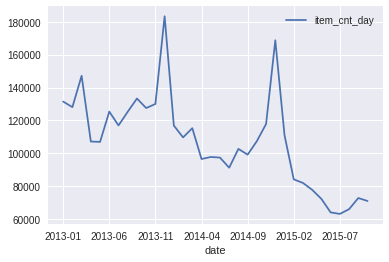

In [6]:
%matplotlib inline
df_all_sales_summed.plot()

# Get an overview of the items sold per shop


In [7]:
df_all_sales_per_shop = pd.DataFrame(df_train, columns=['date', 'item_cnt_day', 'shop_id'])
print("Column entry match" if df_all_sales_per_shop.shape[0] == og_df_size else "Warning!")

df_all_sales_per_shop.set_index(['date', 'shop_id'], inplace=True)

Column entry match


In [8]:
df_all_sales_per_shop_summed = df_all_sales_per_shop.sum(level=['date', 'shop_id'])
print(df_all_sales_per_shop_summed)

                 item_cnt_day
date    shop_id              
2013-01 59             2017.0
        25             8215.0
        24             1768.0
        23             1948.0
        19             3038.0
...                       ...
2015-10 28             3018.0
        26             1409.0
        25             6247.0
        24             1227.0
        21             1912.0

[1586 rows x 1 columns]


In [9]:

df_all_sales_per_shop_summed = df_all_sales_per_shop_summed.swaplevel(i='shop_id', j='date')
print(df_all_sales_per_shop_summed.head())
print(df_all_sales_per_shop_summed.shape)

# foo = df_all_sales_per_shop_summed.groupby(by='date')
# foo.head()
# print(foo.describe)

# df_all_sales_per_shop_summed

                 item_cnt_day
shop_id date                 
59      2013-01        2017.0
25      2013-01        8215.0
24      2013-01        1768.0
23      2013-01        1948.0
19      2013-01        3038.0
(1586, 1)


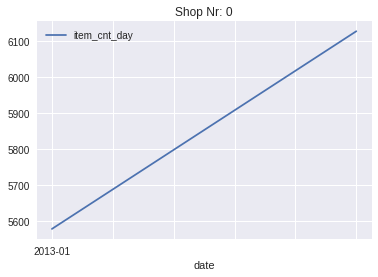

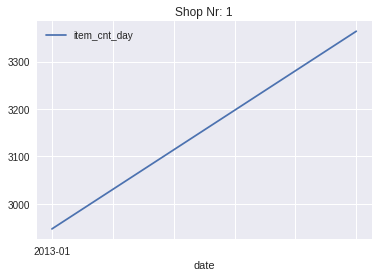

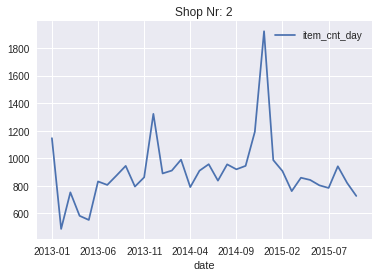

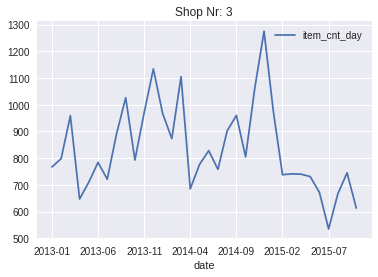

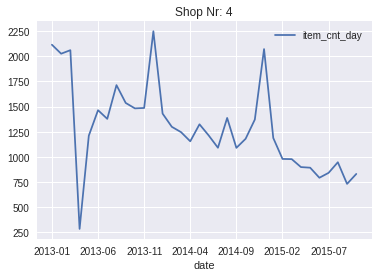

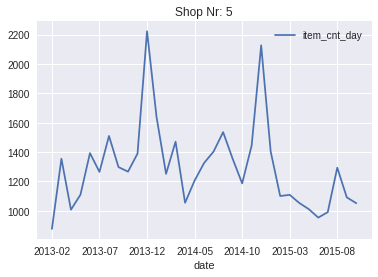

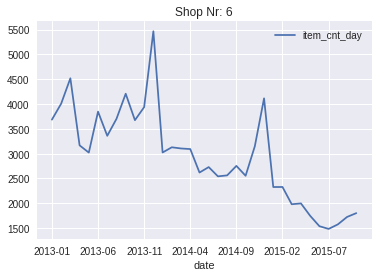

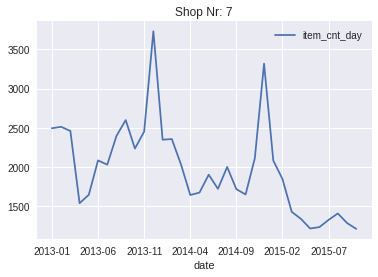

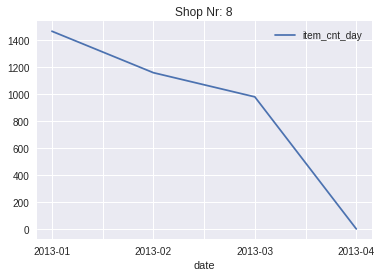

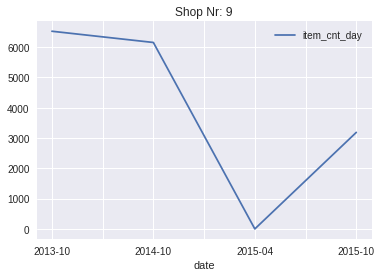

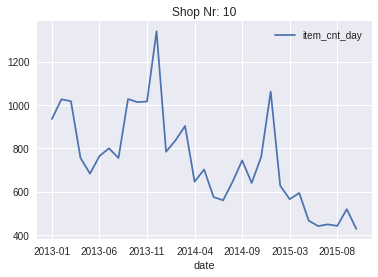

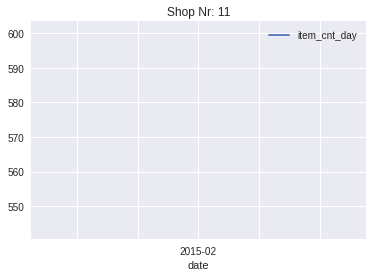

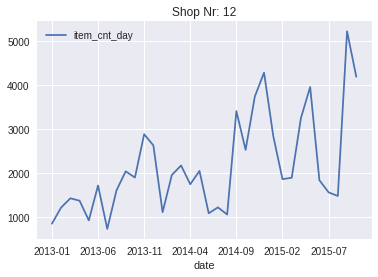

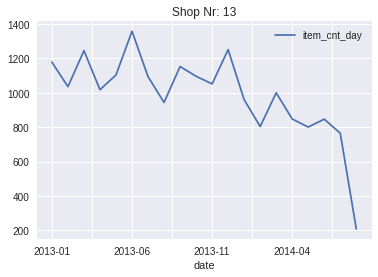

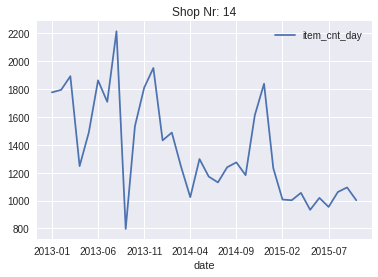

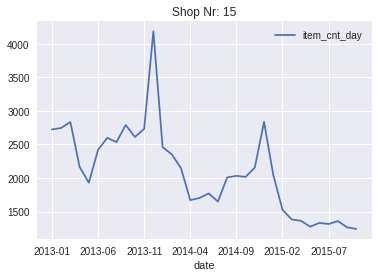

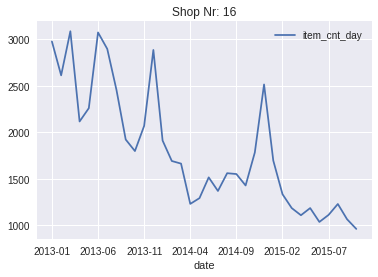

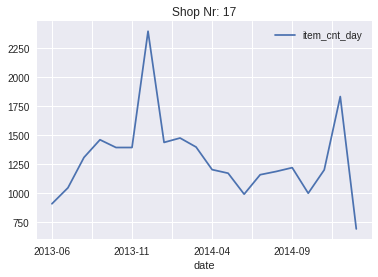

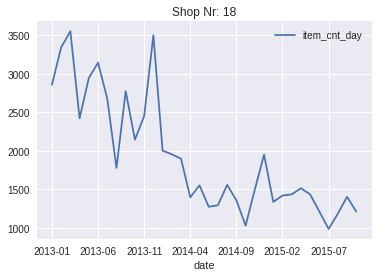

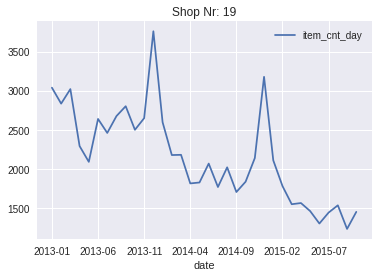

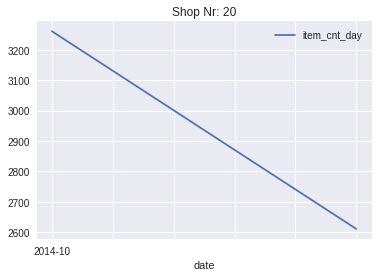

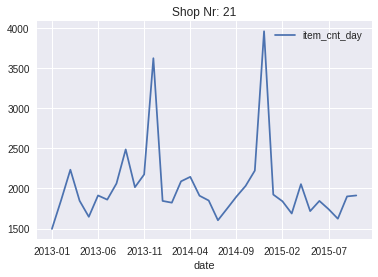

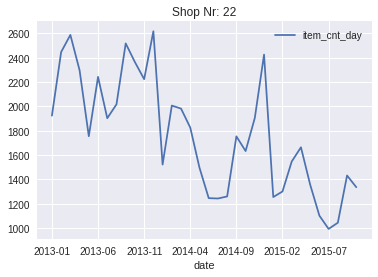

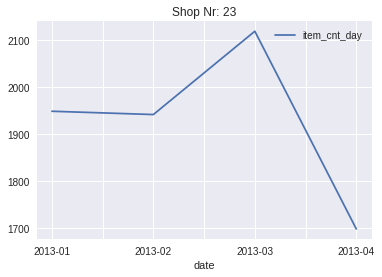

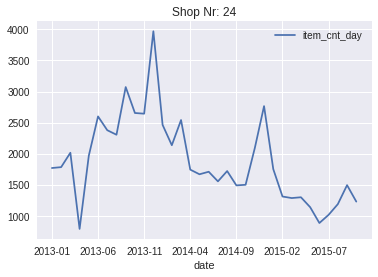

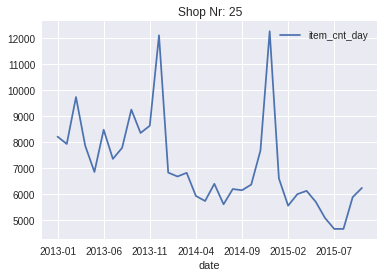

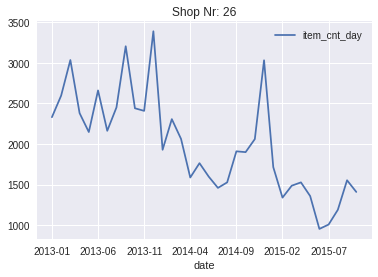

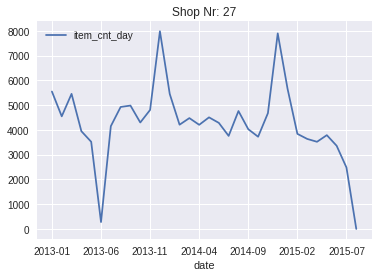

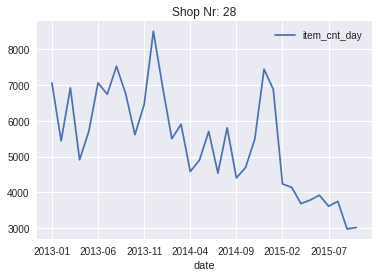

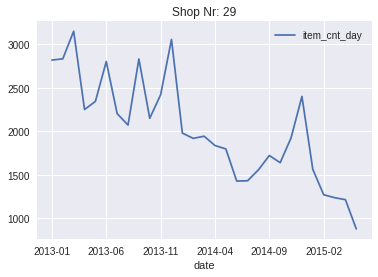

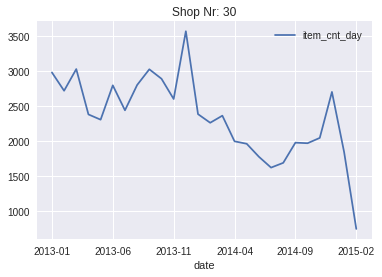

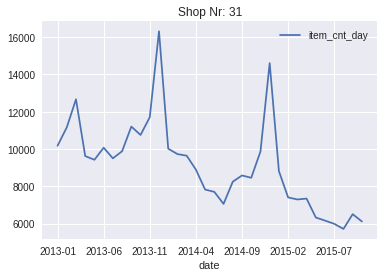

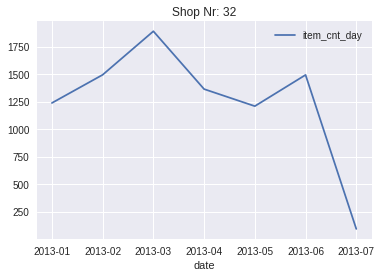

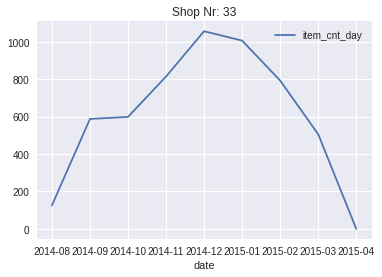

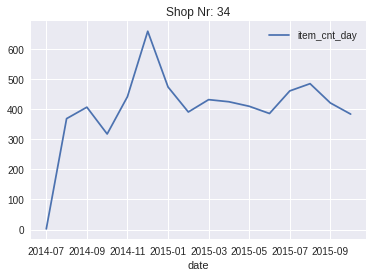

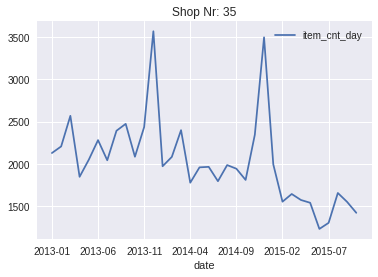

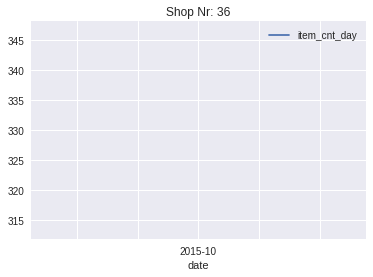

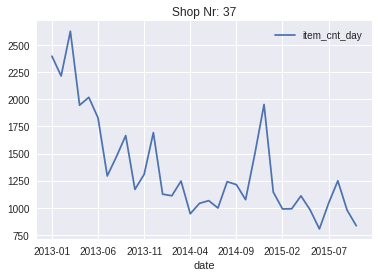

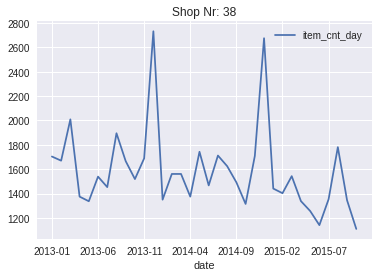

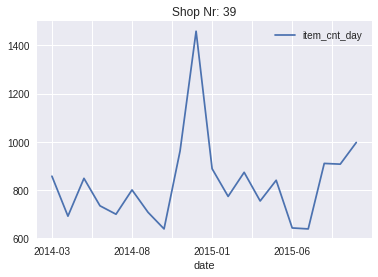

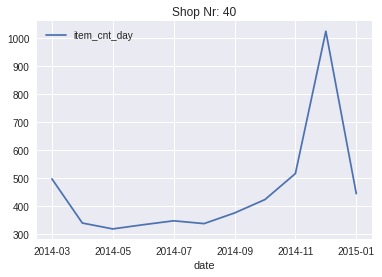

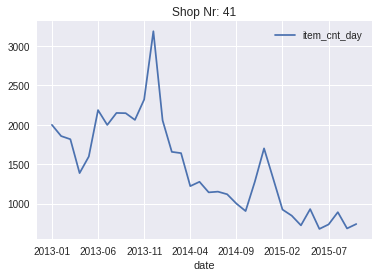

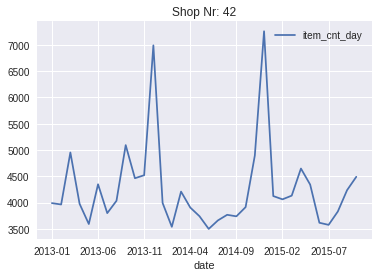

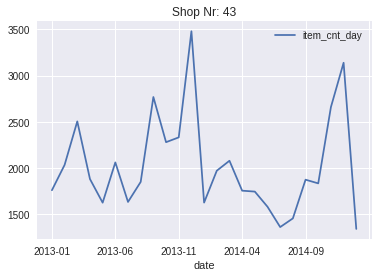

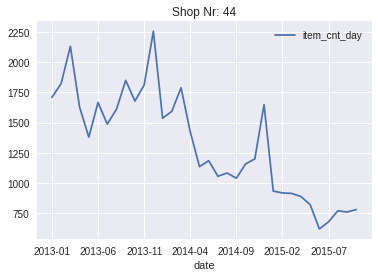

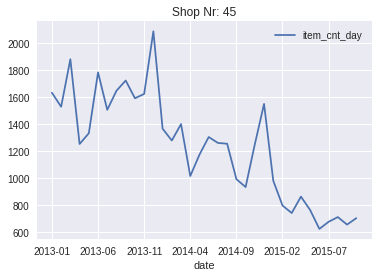

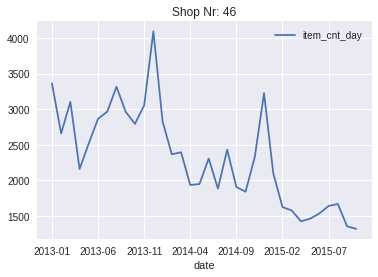

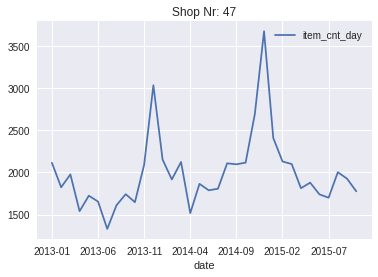

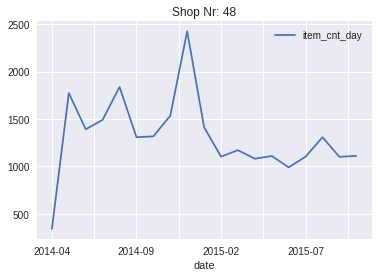

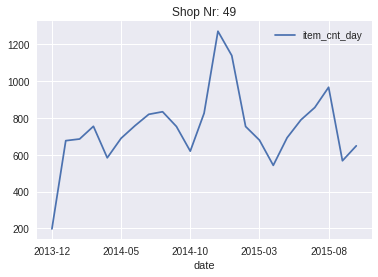

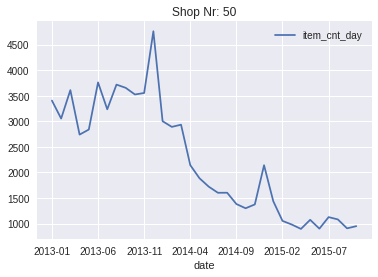

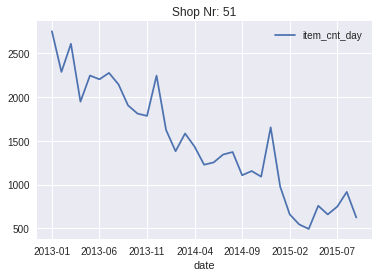

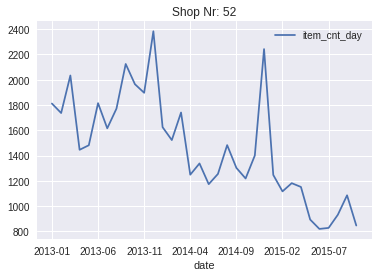

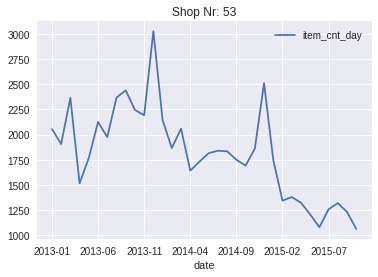

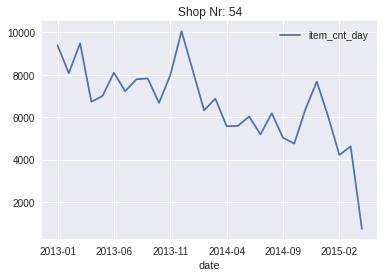

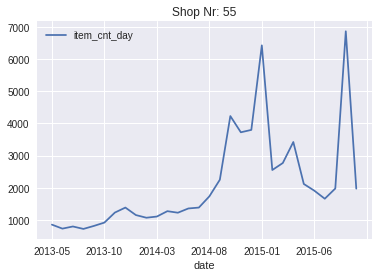

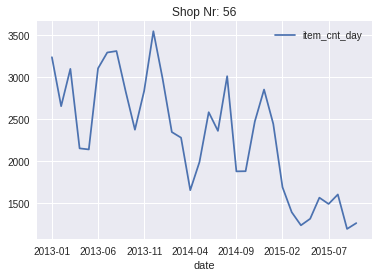

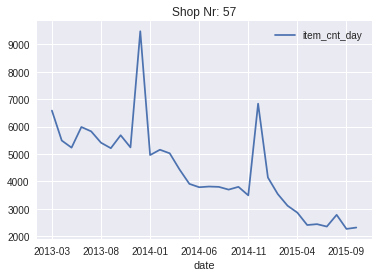

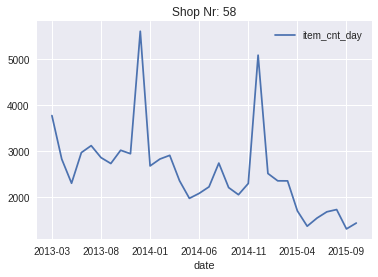

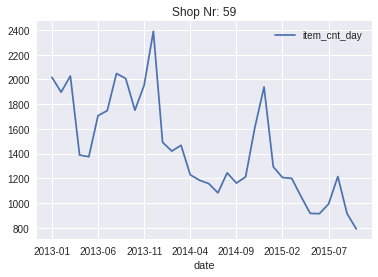

In [10]:
# print all the graphs

df = df_all_sales_per_shop_summed
df.reset_index(inplace=True, level=['shop_id'])
# print(df.head())
# print(df.shape)

# df_this_shop = df.loc[df['shop_id'] == 52]
# print(df_this_shop)
for shop in df_shops['shop_id']:
    df_this_shop = df.loc[df['shop_id'] == shop]
    df_this_shop = df_this_shop.drop(['shop_id'], axis=1)
    plot = df_this_shop.plot()
    plot.set_title(f"Shop Nr: {shop}")
    # print(df_this_shop)


# Get an overview of all the item categories sold


In [11]:
# create new dataframe and merge with item info to get the item category id
df_all_sales_per_category = pd.DataFrame(df_train, columns=['date', 'item_cnt_day', 'item_id'])
df_all_sales_per_category = df_all_sales_per_category.set_index('item_id').join(df_items.set_index('item_id'))


In [12]:
# verify column size matches and drop the item name
print("Column entry match" if df_all_sales_per_category.shape[0] == og_df_size else "Warning!")
df_all_sales_per_category = df_all_sales_per_category.drop(['item_name'], axis=1)
df_all_sales_per_category.head()


Column entry match


,date,item_cnt_day,item_category_id
item_id,,,
0,2014-09,1.0,40
1,2014-04,1.0,76
1,2014-04,1.0,76
1,2014-07,1.0,76
1,2014-08,1.0,76


In [13]:
# reset index and get rid of the item id
df_all_sales_per_category = df_all_sales_per_category.reset_index()
df_all_sales_per_category = df_all_sales_per_category.drop(['item_id'], axis=1)
df_all_sales_per_category.head()


,date,item_cnt_day,item_category_id
0,2014-09,1.0,40
1,2014-04,1.0,76
2,2014-04,1.0,76
3,2014-07,1.0,76
4,2014-08,1.0,76


In [14]:
# sum up all items sold in function of the item category and the date
df_all_sales_per_category.set_index(['date', 'item_category_id'], inplace=True)
df_all_sales_per_category_summed = df_all_sales_per_category.sum(level=['date', 'item_category_id'])
print(df_all_sales_per_category_summed)


                          item_cnt_day
date    item_category_id              
2014-09 40                     12748.0
2014-04 76                       164.0
2014-07 76                       218.0
2014-08 76                       254.0
2014-09 76                       267.0
...                                ...
2015-06 83                       258.0
2015-07 83                       298.0
2015-08 83                       293.0
2015-09 83                       277.0
2015-10 83                       348.0

[2077 rows x 1 columns]


In [15]:
# remove the duplicates and re-sort a new item category df
df_item_categories = df_items['item_category_id']
df_item_categories = df_item_categories.drop_duplicates()
df_item_categories = df_item_categories.sort_values()

df_item_categories

5441      0
5606      1
5570      2
5652      3
1955      4
         ..
17717    79
9244     80
13346    81
13344    82
22085    83
Name: item_category_id, Length: 84, dtype: int64

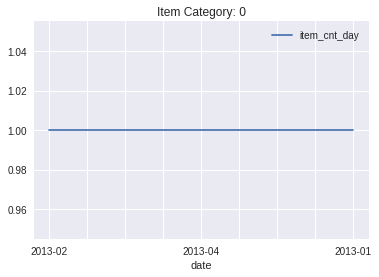

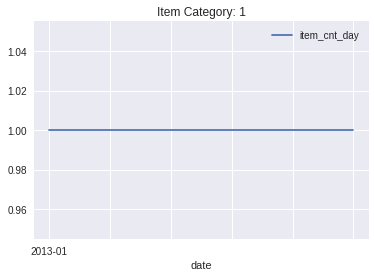

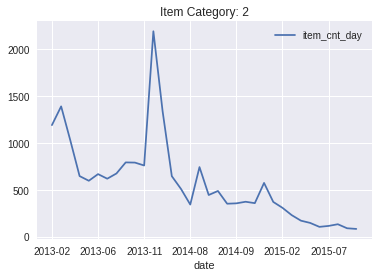

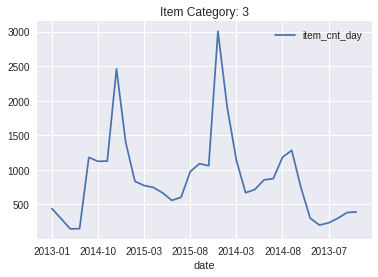

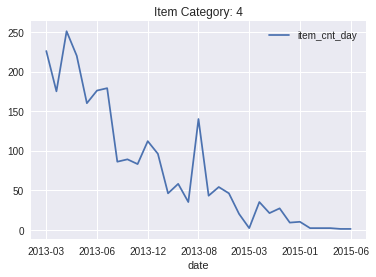

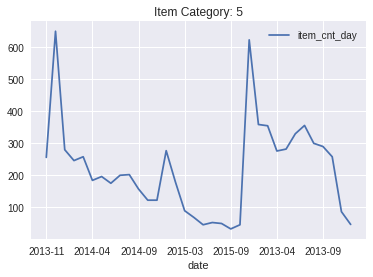

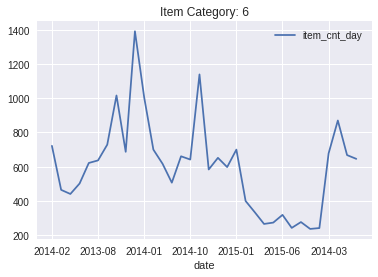

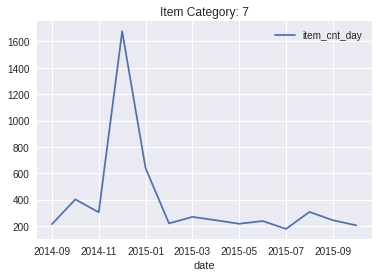

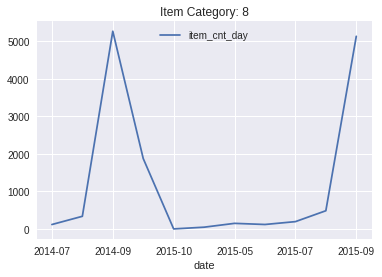

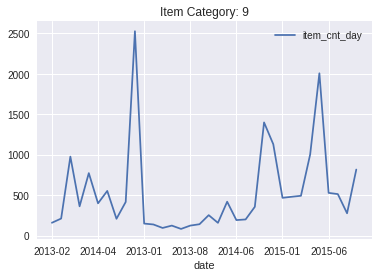

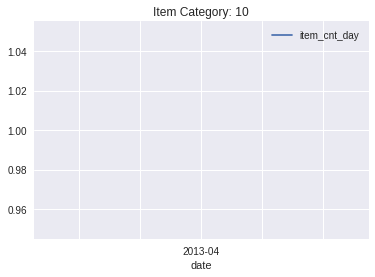

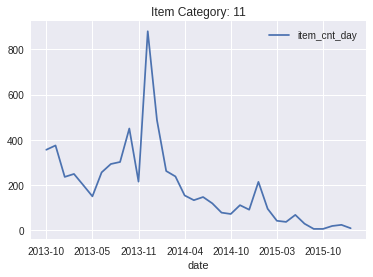

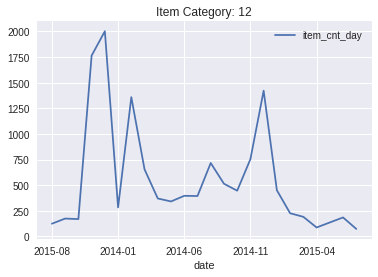

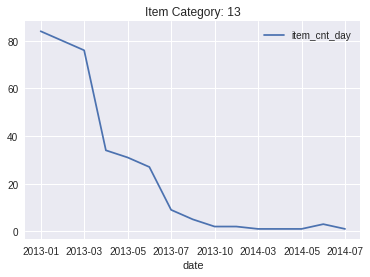

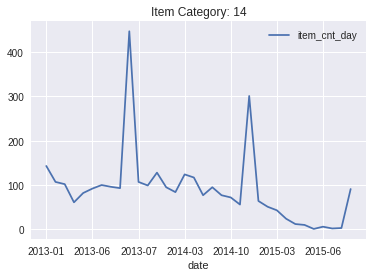

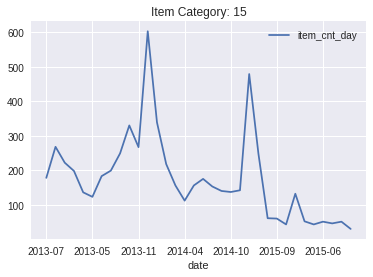

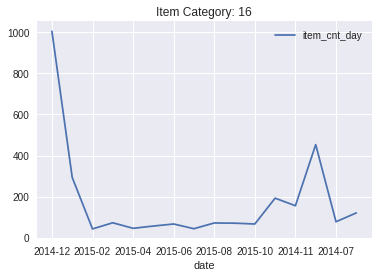

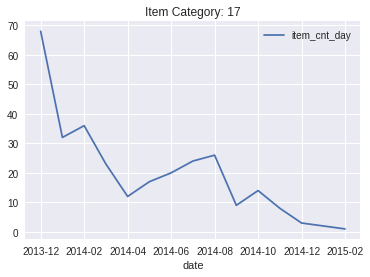

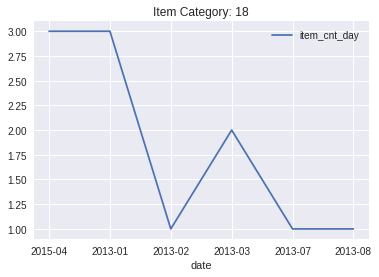

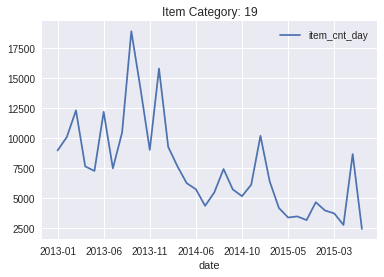

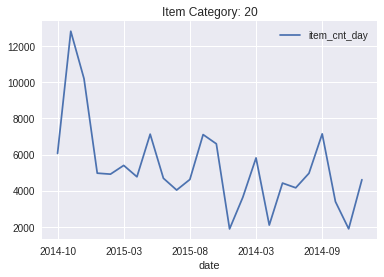

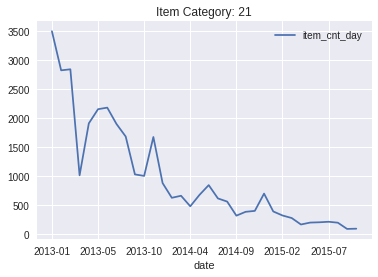

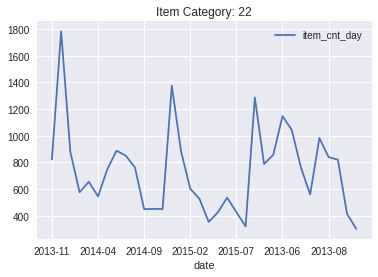

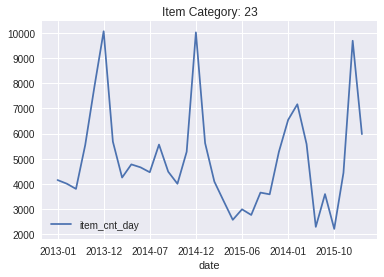

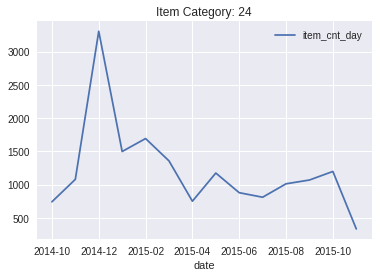

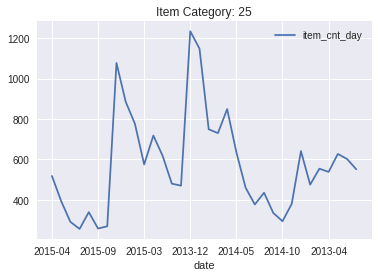

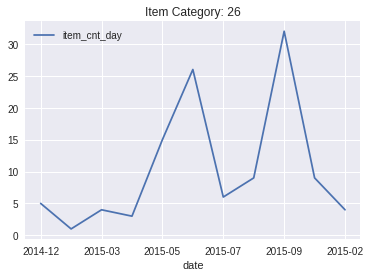

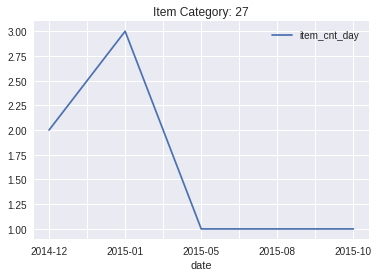

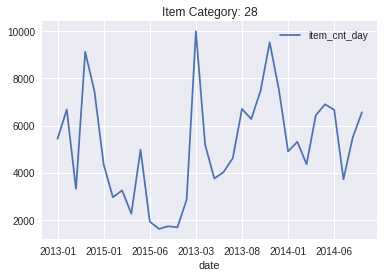

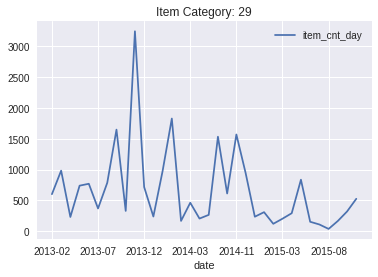

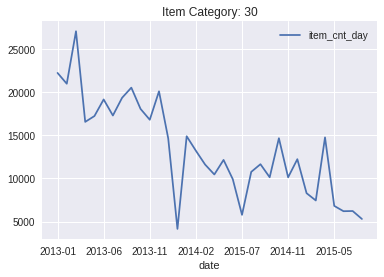

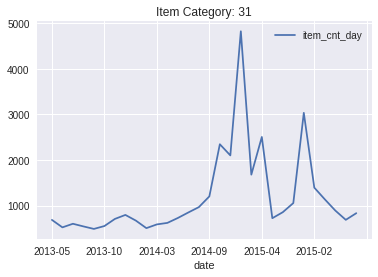

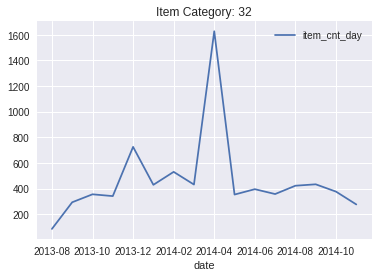

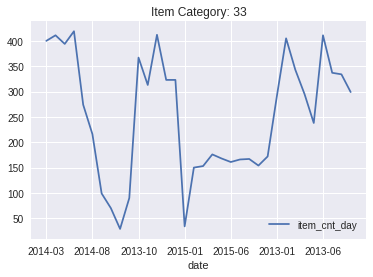

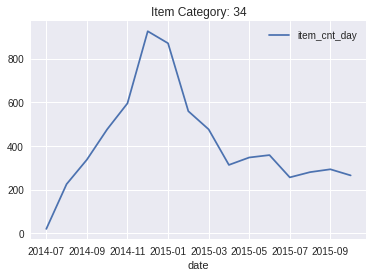

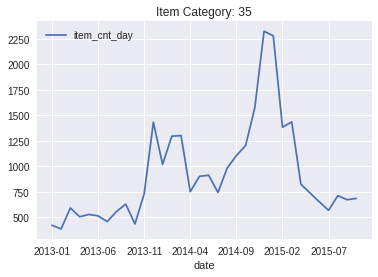

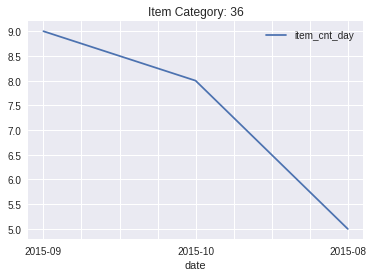

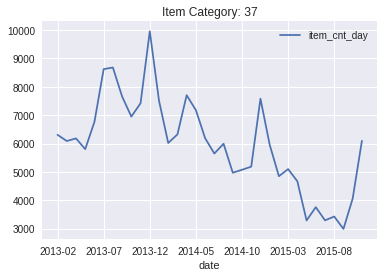

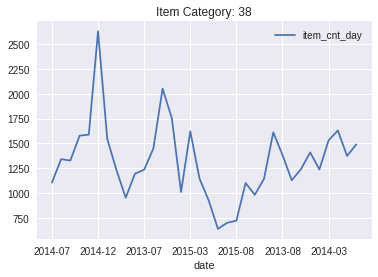

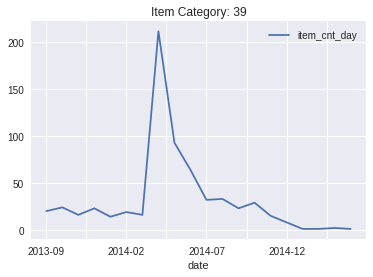

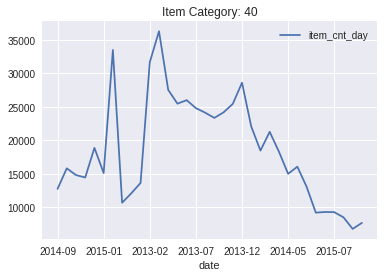

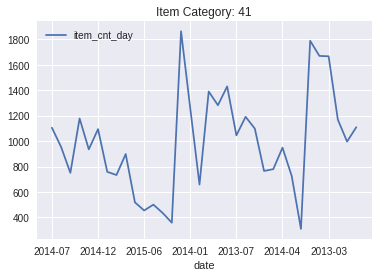

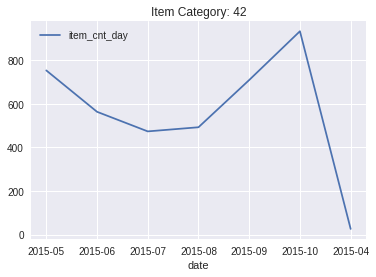

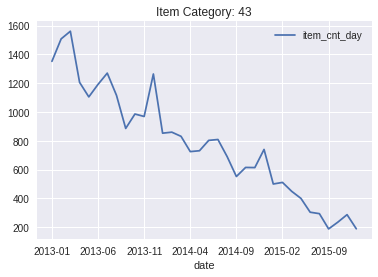

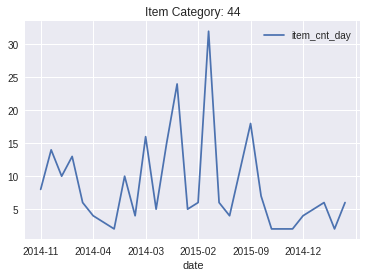

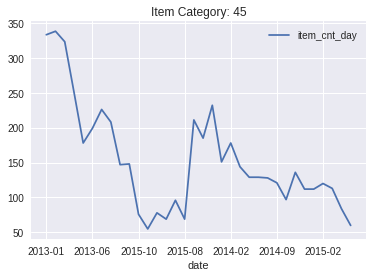

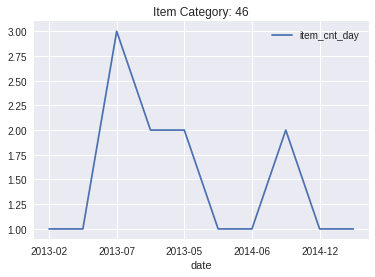

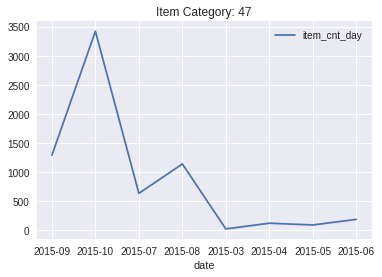

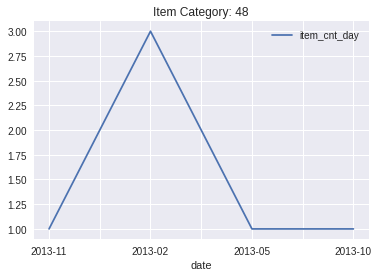

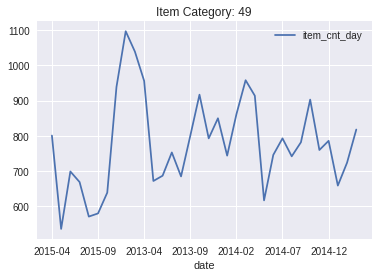

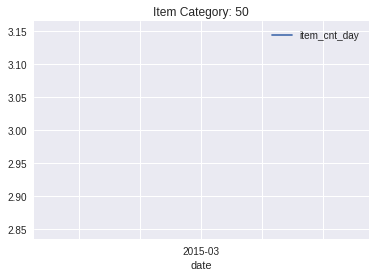

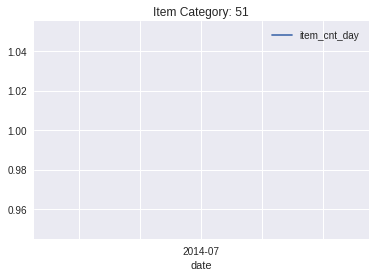

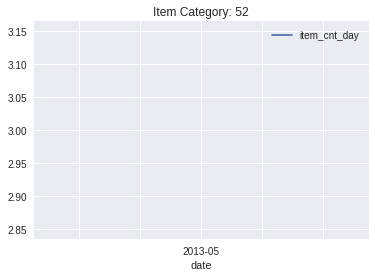

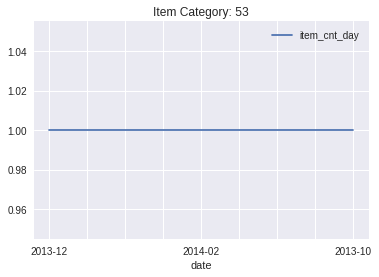

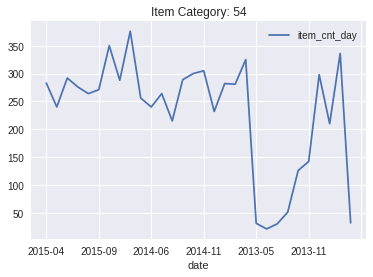

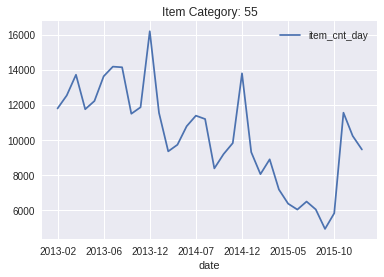

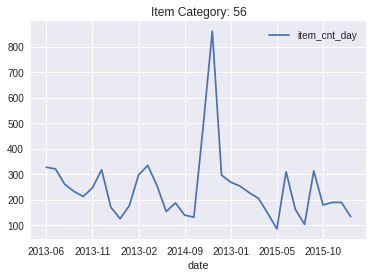

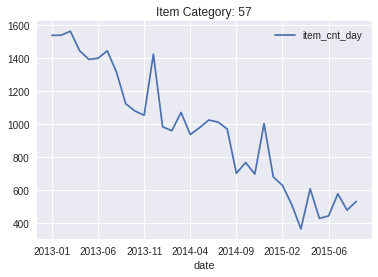

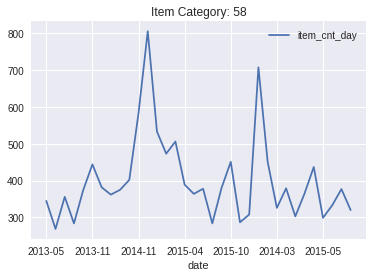

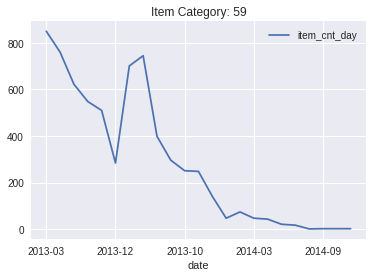

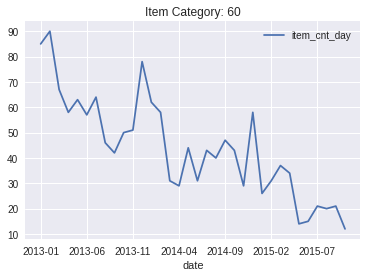

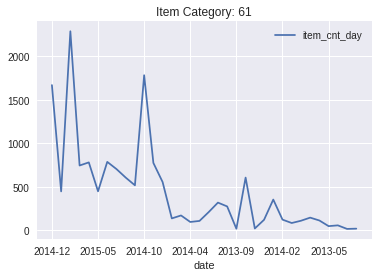

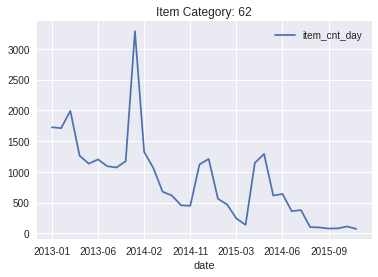

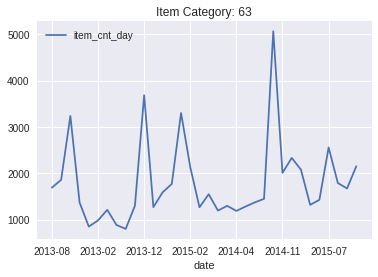

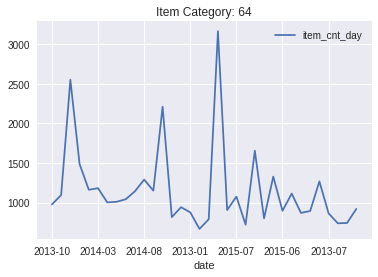

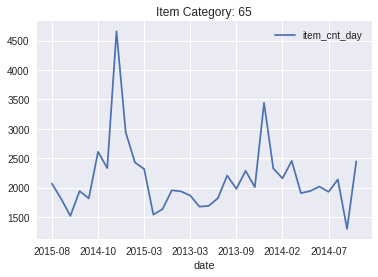

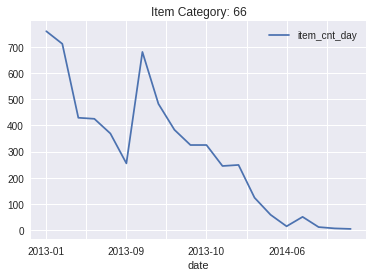

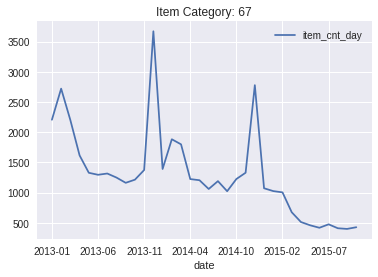

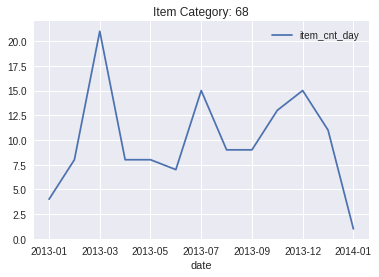

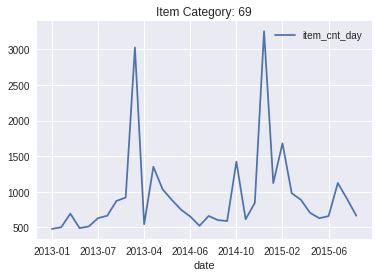

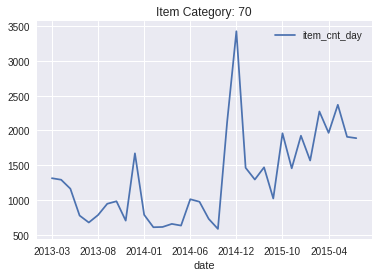

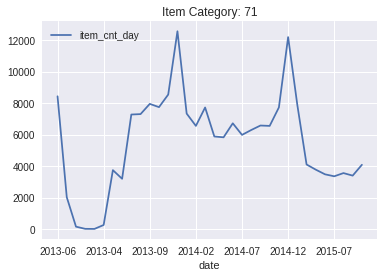

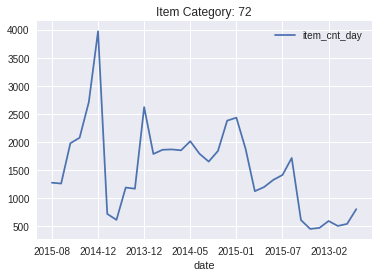

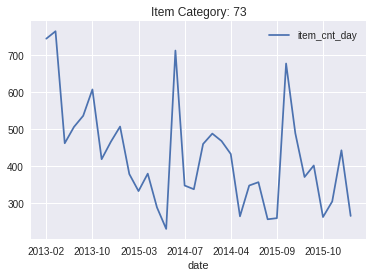

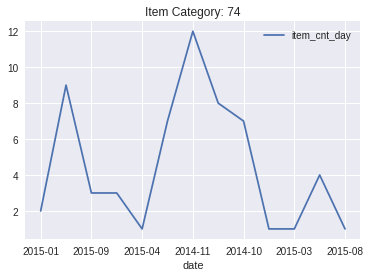

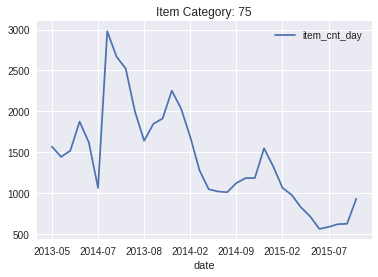

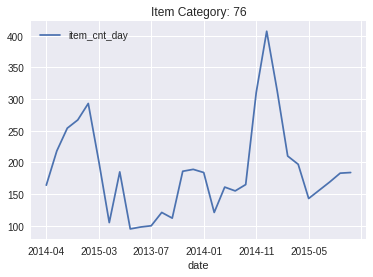

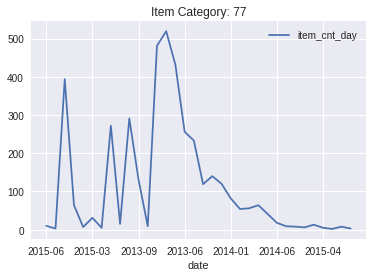

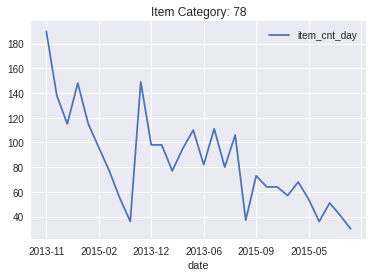

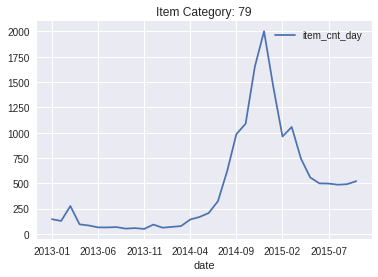

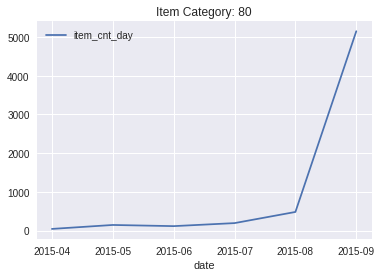

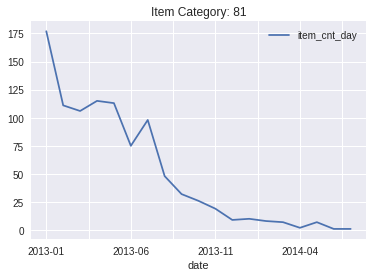

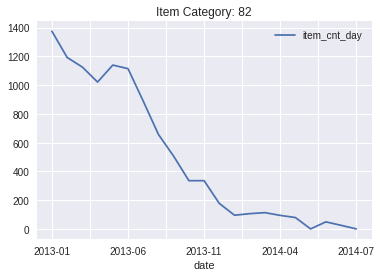

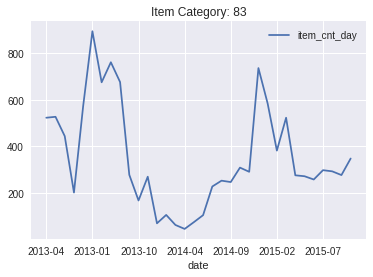

In [16]:
# remove the no longer used index in the df
df = df_all_sales_per_category_summed
df.reset_index(inplace=True, level=['item_category_id'])


df.head()

for category in df_item_categories:
    df_this_category = df.loc[df['item_category_id'] == category]
    df_this_category = df_this_category.drop(['item_category_id'], axis=1)
    plot = df_this_category.plot()
    plot.set_title(f"Item Category: {category}")